# Evaluation

We are loading the [persisted model](../../data/model/convolutional_dataset) and use it to create predictions based on the test data. The predictions are used to plot the confusion matrix.

In [32]:
from keras.models import load_model
from numpy import argmax
from pandas import DataFrame, concat

from data.file import model_convolutional_dataset
from data.load import load_test_dataset
from reporting.evaluation import plot_confusion_matrix
from reporting.images import display_dataframe

In [33]:
model = load_model(model_convolutional_dataset)

In [34]:
x_test, y_test = load_test_dataset(normalize=True)

In [35]:
compare_items = 10000
prediction = [argmax(x) for x in model.predict(x_test[:compare_items])]
expectation = y_test[:compare_items]
comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)

## Confusion Matrix
Based on the Confusion Matrix below we see that the model provides a recall of roughly 99% across all digits.

We can read the misspredictions out of the confusion matrix based on the given label:
- **0**: uniform misspredictions across 2, 6, 7, 8
- **1**: uniform misspredictions across 2, 3, 5, 6, 7, 8
- **2**: most misspredictions: 7, 8
- **3**: most misspredictions: 5
- **4**: most misspredictions: 6
...

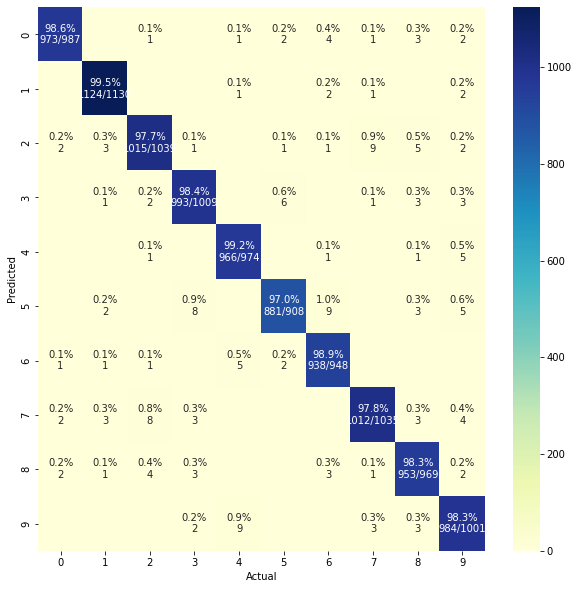

In [36]:
plot_confusion_matrix(prediction, expectation)

# Mismatches

The following section shows the items where the prediction did not match across 10000 predictions.

The format of the label is
```
prediction (label)
```

In [37]:
missmatch = comparison[comparison.prediction != comparison.actual]

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


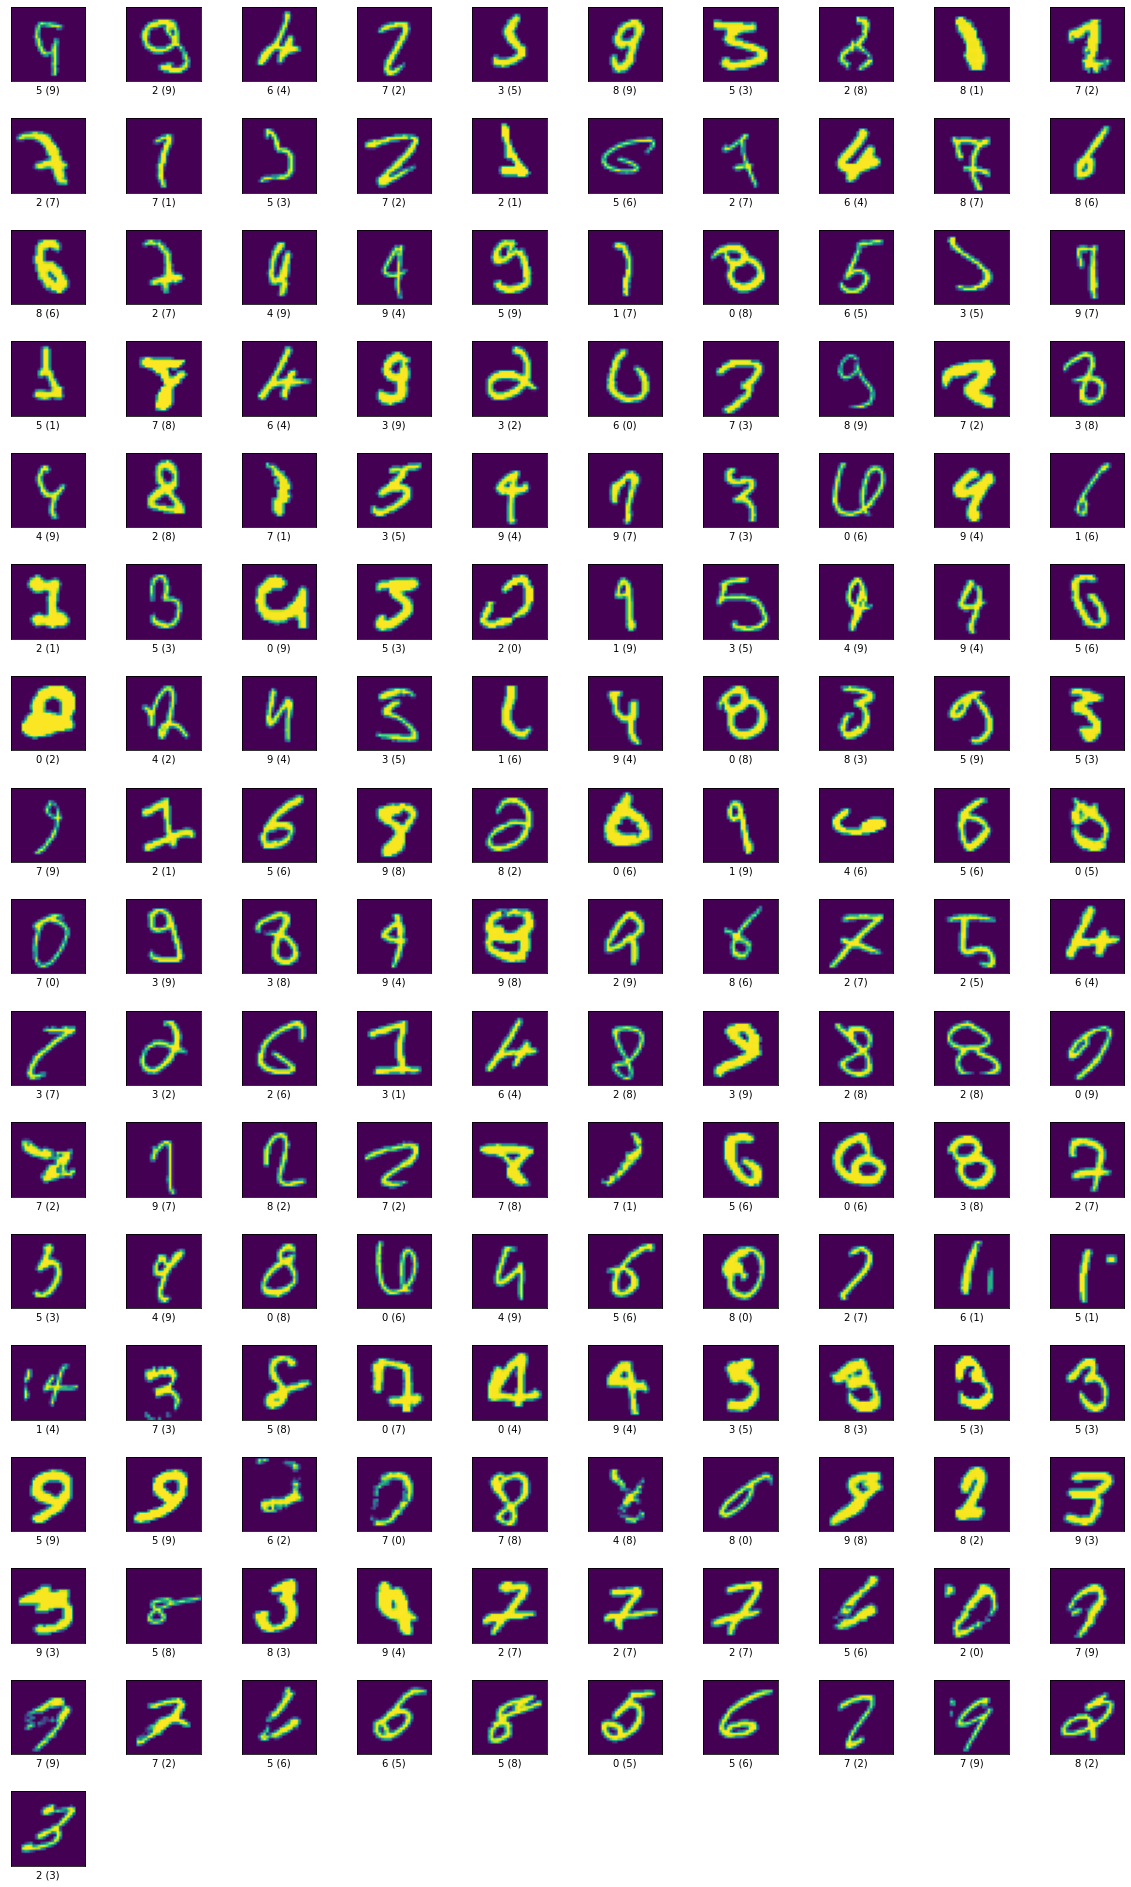

In [38]:
labels = (missmatch.prediction.map(str) + " (" + missmatch.actual.map(str) + ")").tolist()
display_dataframe(x_test[missmatch.index], cols=10, labels=labels)